In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [5]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\ai4i2020.csv")

In [6]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [10]:
df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
UDI,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Product ID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Type,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Air temperature [K],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Process temperature [K],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rotational speed [rpm],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Torque [Nm],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tool wear [min],False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Machine failure,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TWF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [16]:
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

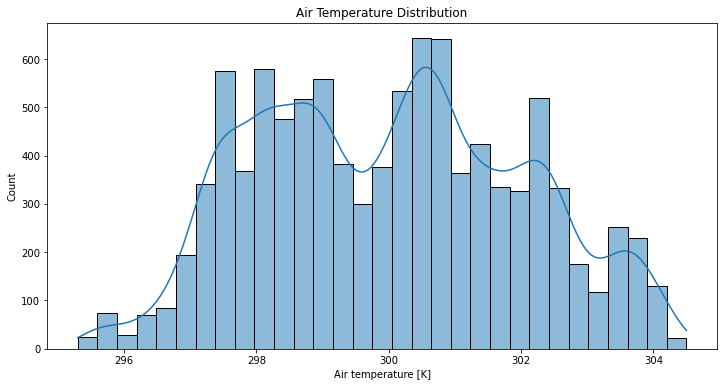

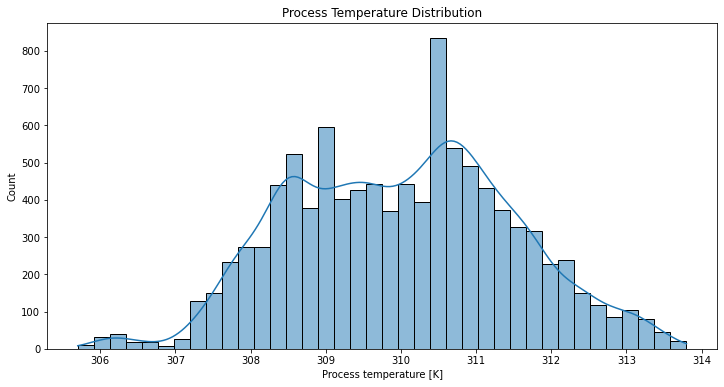

In [17]:

#I visualized data distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Air temperature [K]'], kde=True)
plt.title('Air Temperature Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Process temperature [K]'], kde=True)
plt.title('Process Temperature Distribution')
plt.show()

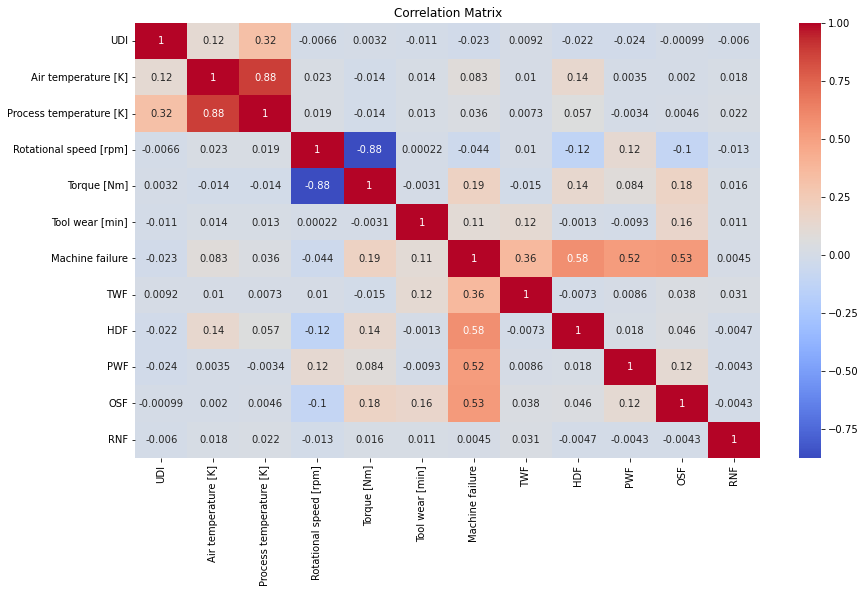

In [18]:
# Calculating correlation matrix with heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# New feature: Temperature difference calculation
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

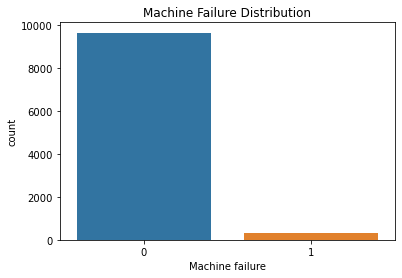

In [21]:
# The distribution of the target variable (Machine failure) was examined
sns.countplot(x='Machine failure', data=df)
plt.title('Machine Failure Distribution')
plt.show()

In [22]:

#Quantification of categorical variables
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [23]:

# Separation of goals and features
X = df.drop(columns=['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

In [24]:
# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Create and train models
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# make a guess
y_pred = model.predict(X_test)

In [27]:

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1935    4]
 [  23   38]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.90      0.62      0.74        61

    accuracy                           0.99      2000
   macro avg       0.95      0.81      0.87      2000
weighted avg       0.99      0.99      0.99      2000



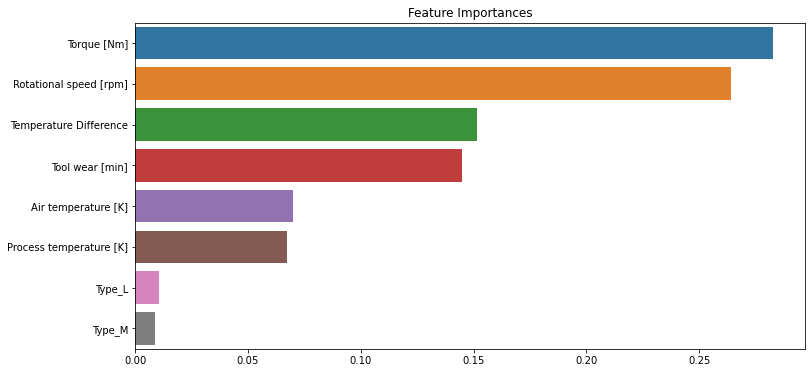

In [30]:

# Visualization of Important Features
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()

In [32]:

X_test['Predicted Failure'] = y_pred
X_test['Actual Failure'] = y_test.values


X_test['UDI'] = df.loc[X_test.index, 'UDI']
X_test['Product ID'] = df.loc[X_test.index, 'Product ID']


print(X_test[['UDI', 'Product ID', 'Predicted Failure', 'Actual Failure']].head())


       UDI Product ID  Predicted Failure  Actual Failure
6252  6253     L53432                  0               0
4684  4685     M19544                  0               1
1731  1732     M16591                  0               0
4742  4743     L51922                  0               0
4521  4522     L51701                  0               0


In [33]:
#Filter out machines that have actually broken down
failures_detected = X_test[X_test['Actual Failure'] == 1]
print(failures_detected[['UDI', 'Product ID', 'Predicted Failure', 'Actual Failure']])


       UDI Product ID  Predicted Failure  Actual Failure
4684  4685     M19544                  0               1
6340  6341     H35754                  0               1
3787  3788     L50967                  1               1
1123  1124     H30537                  0               1
4071  4072     L51251                  1               1
...    ...        ...                ...             ...
7087  7088     L54267                  0               1
7763  7764     L54943                  1               1
4326  4327     L51506                  1               1
4816  4817     L51996                  0               1
1095  1096     L48275                  1               1

[61 rows x 4 columns]


In [34]:
# The model detected a fault, but there is actually no fault
false_positives = X_test[(X_test['Predicted Failure'] == 1) & (X_test['Actual Failure'] == 0)]
print(false_positives[['UDI', 'Product ID', 'Predicted Failure', 'Actual Failure']])

# model arıza tespit etmemiş, ama aslında arıza var
false_negatives = X_test[(X_test['Predicted Failure'] == 0) & (X_test['Actual Failure'] == 1)]
print(false_negatives[['UDI', 'Product ID', 'Predicted Failure', 'Actual Failure']])


       UDI Product ID  Predicted Failure  Actual Failure
4302  4303     L51482                  1               0
3387  3388     M18247                  1               0
4220  4221     M19080                  1               0
6437  6438     L53617                  1               0
       UDI Product ID  Predicted Failure  Actual Failure
4684  4685     M19544                  0               1
6340  6341     H35754                  0               1
1123  1124     H30537                  0               1
3350  3351     L50530                  0               1
5309  5310     M20169                  0               1
1509  1510     L48689                  0               1
2075  2076     L49255                  0               1
1087  1088     H30501                  0               1
3529  3530     L50709                  0               1
1833  1834     L49013                  0               1
586    587     L47766                  0               1
6255  6256     L53435          

In [35]:
 
# Filter machines with correct fault detection (True Positive)
true_positives = X_test[(X_test['Predicted Failure'] == 1) & (X_test['Actual Failure'] == 1)]


print(true_positives[['UDI', 'Product ID', 'Predicted Failure', 'Actual Failure']])


       UDI Product ID  Predicted Failure  Actual Failure
3787  3788     L50967                  1               1
4071  4072     L51251                  1               1
4081  4082     L51261                  1               1
8846  8847     M23706                  1               1
259    260     M15119                  1               1
2233  2234     L49413                  1               1
4130  4131     L51310                  1               1
4140  4141     L51320                  1               1
4731  4732     L51911                  1               1
4851  4852     L52031                  1               1
9414  9415     L56594                  1               1
4080  4081     L51260                  1               1
4185  4186     L51365                  1               1
4768  4769     L51948                  1               1
4151  4152     M19011                  1               1
3019  3020     L50199                  1               1
4475  4476     L51655          